In [1]:
# program to predict the find the average price and region of avocados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# read csv file
df = pd.read_csv('https://raw.githubusercontent.com/vageesh88/ML-Projects/master/Avocado%20Project/avocado.csv')
df.columns = df.columns.str.replace(' ','_')
# rename columns for using in operations
df.rename({"4046":"PLU_4046","4225":"PLU_4225","4770":"PLU_4770"}, axis = "columns", inplace = True)
df

,Unnamed:_0,Date,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [2]:
# check size of dataset
df.shape

(18249, 14)

In [3]:
df.describe()

,Unnamed:_0,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


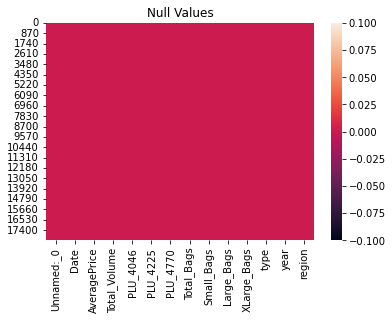

In [4]:
# check for any null values
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

In [5]:
# summing up total null values in dataset
df.isnull().sum().sum()

0

In [6]:
del df[df.columns[0]]

In [7]:
del df[df.columns[0]]
df

,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [8]:
# getting all column names to observe type of variables
df.columns

Index(['AveragePrice', 'Total_Volume', 'PLU_4046', 'PLU_4225', 'PLU_4770',
       'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge_Bags', 'type', 'year',
       'region'],
      dtype='object')

In [9]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [10]:
df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [11]:
# encoding string type data to use them in plotting and making model on basis of observations
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['type'] = LE.fit_transform(df['type'])

In [12]:
LE2 = LabelEncoder()
df['region'] = LE2.fit_transform(df['region'])

In [13]:
LE.inverse_transform([0,1])

array(['conventional', 'organic'], dtype=object)

In [14]:
LE2.inverse_transform(df['region'])

array(['Albany', 'Albany', 'Albany', ..., 'WestTexNewMexico',
       'WestTexNewMexico', 'WestTexNewMexico'], dtype=object)

In [15]:
df

,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


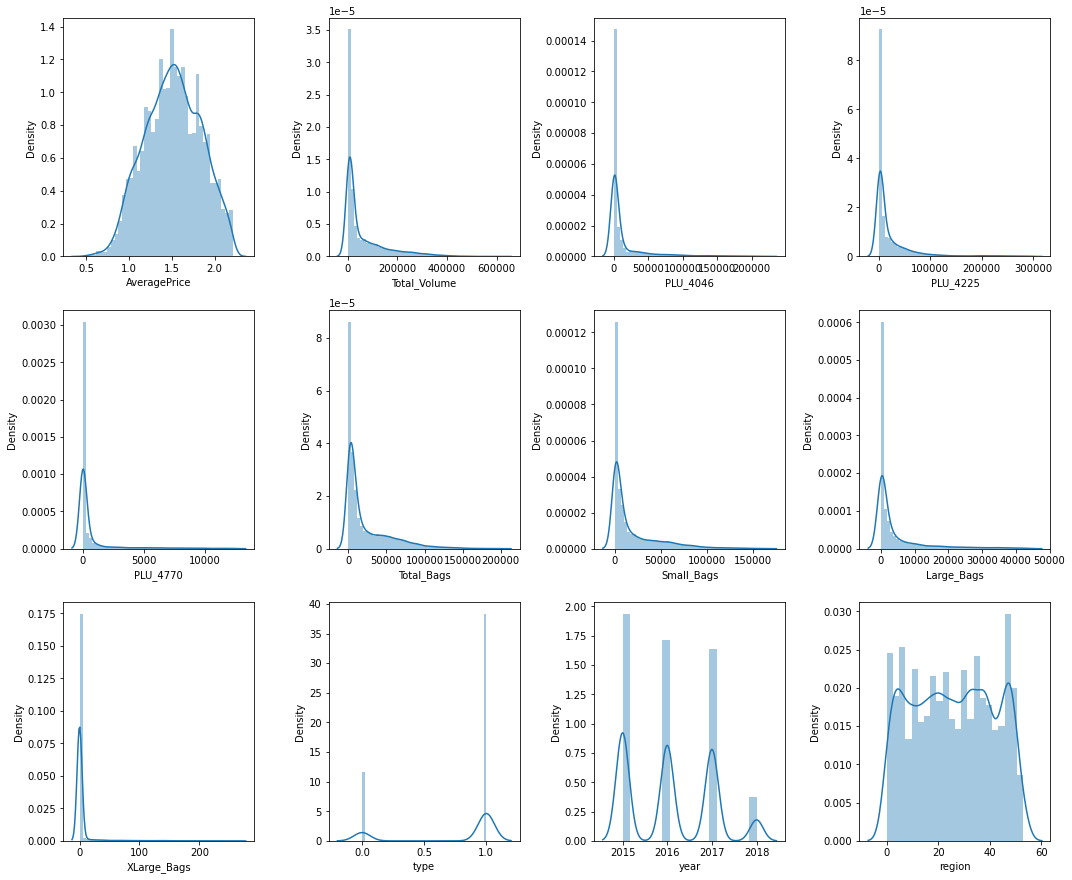

In [67]:
import warnings
plt.figure(figsize=(15,20),facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=17:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [17]:
df.corr()

,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total_Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
PLU_4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
PLU_4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
PLU_4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total_Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small_Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large_Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768
XLarge_Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280


<AxesSubplot:>

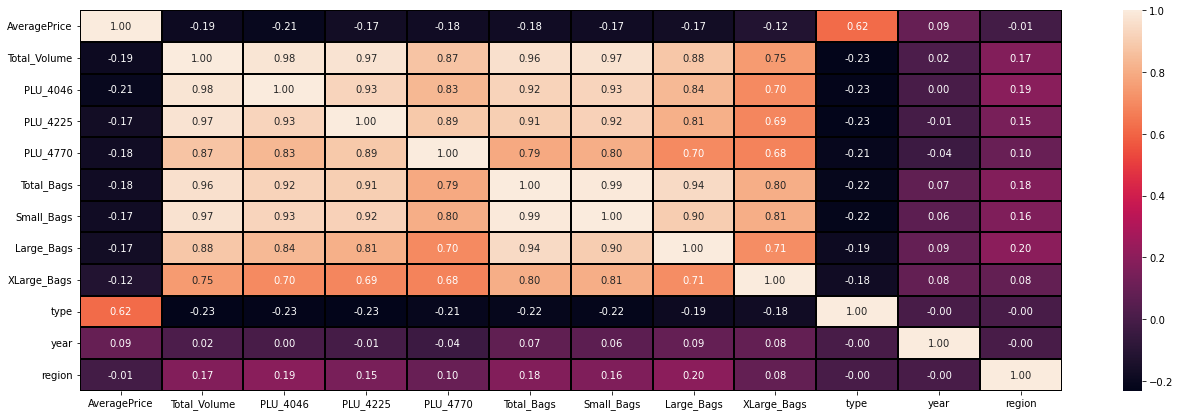

In [18]:
# checking corelation
corr_mat = df.corr()
plt.figure(figsize=(22,7))
sns.heatmap(corr_mat,annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

In [19]:
# Preprocessing
# spliting dependent and independent variables on x and y axis before removing skewness
x = df.drop('AveragePrice',axis=1)
y = df['AveragePrice']

In [20]:
x

,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [21]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

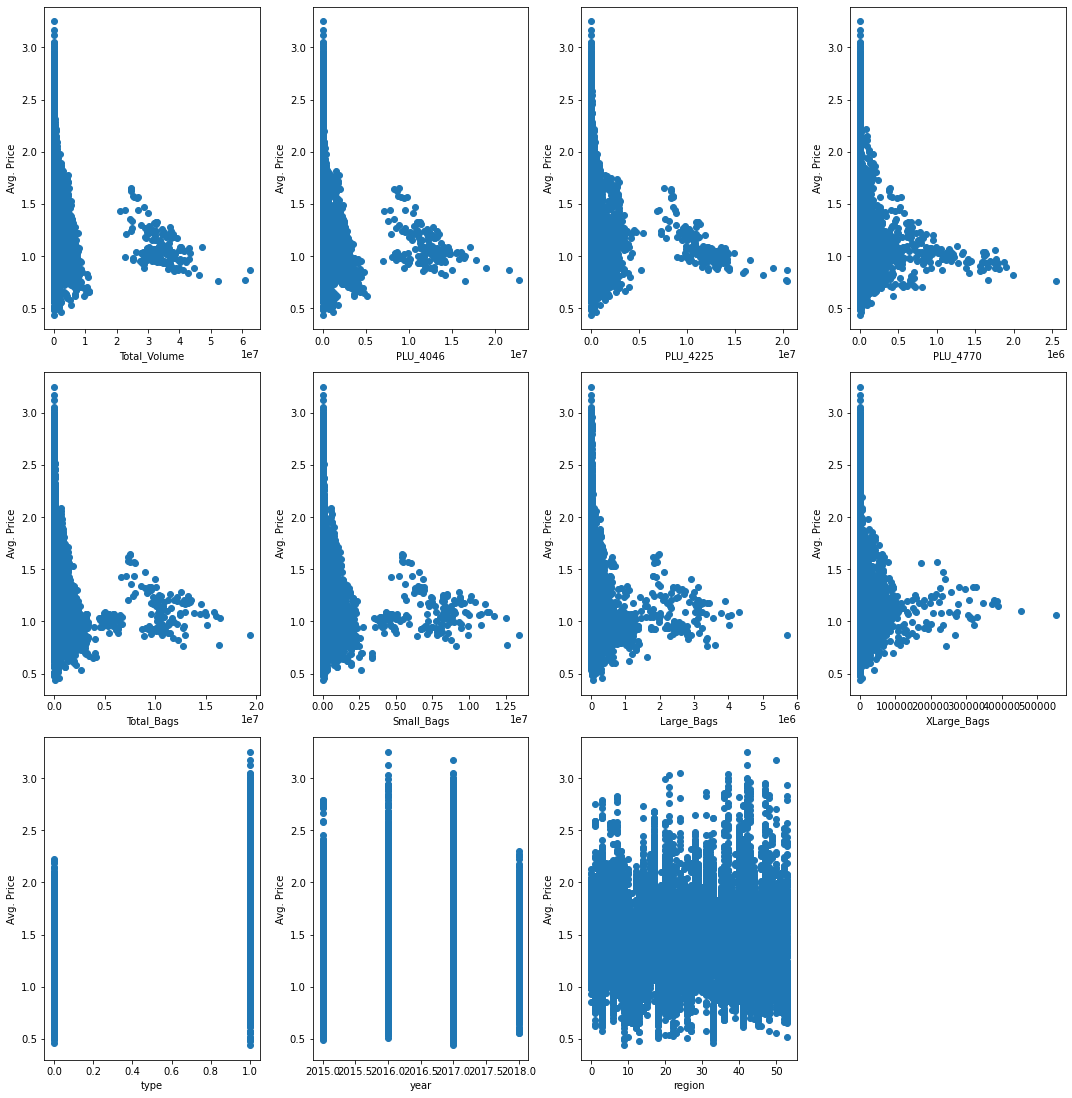

In [22]:
# making scatter plot of avg. rate vs other independent variables in dataset for observations
plt.figure(figsize=(15,20),facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Avg. Price',fontsize=10)
    plotnumber+=1
plt.tight_layout()

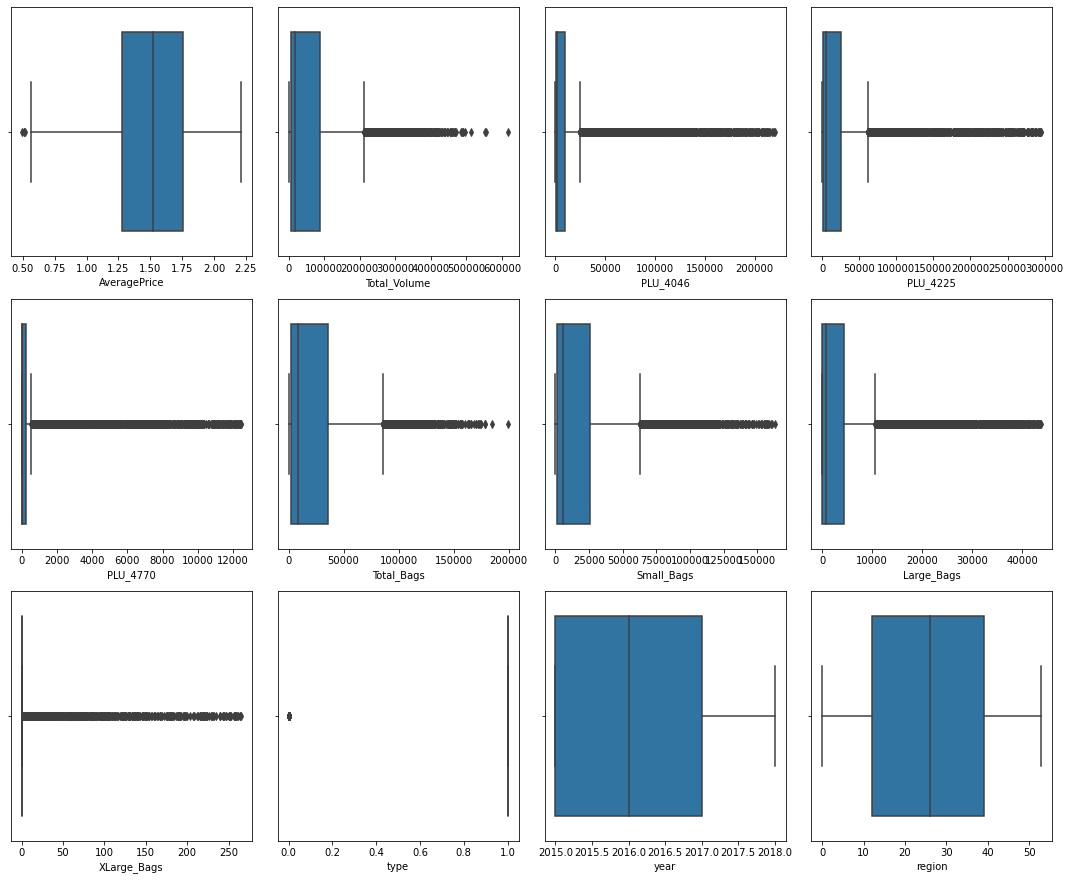

In [68]:
# checking for outliers by boxplot
plt.figure(figsize=(15,20),facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=17:
        ax = plt.subplot(5,4,plotnumber)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [24]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

In [25]:
#removing records with outliers from dataset
vol_high = (q3.Total_Volume + iqr.Total_Volume)
vol_high

855086.0

In [26]:
index = np.where(df['Total_Volume']>vol_high)
df = df.drop(df.index[index])
df.shape

(15527, 12)

In [27]:
df.reset_index()

,index,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15522,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
15523,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
15524,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
15525,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [28]:
price_high = (q3.AveragePrice + iqr.AveragePrice)
index = np.where(df['AveragePrice']>price_high)
df = df.drop(df.index[index])
df.reset_index()

,index,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14904,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
14905,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
14906,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
14907,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [29]:
h_4046 = (q3.PLU_4046 + iqr.PLU_4046)
index = np.where(df['PLU_4046']>h_4046)
df = df.drop(df.index[index])
df.reset_index()

,index,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14275,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
14276,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
14277,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
14278,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [30]:
h_4225 = (q3.PLU_4225 + iqr.PLU_4225)
index = np.where(df['PLU_4225']>h_4225)
df = df.drop(df.index[index])
df.reset_index()

,index,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13519,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
13520,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
13521,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
13522,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [31]:
h_4770 = (q3.PLU_4770 + iqr.PLU_4770)
index = np.where(df['PLU_4770']>h_4770)
df = df.drop(df.index[index])
df.reset_index()

,index,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12423,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
12424,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
12425,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
12426,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [32]:
sbag_high = (q3.Small_Bags + iqr.Small_Bags)
index = np.where(df['Small_Bags']>sbag_high)
df = df.drop(df.index[index])
df.reset_index()

,index,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12254,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
12255,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
12256,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
12257,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [33]:
lbag_high = (q3.Large_Bags + iqr.Large_Bags)
index = np.where(df['Large_Bags']>lbag_high)
df = df.drop(df.index[index])
df.reset_index()

,index,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11632,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
11633,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
11634,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
11635,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [34]:
xlbag_high = (q3.XLarge_Bags + iqr.XLarge_Bags)
index = np.where(df['XLarge_Bags']>xlbag_high)
df = df.drop(df.index[index])
df.reset_index()

,index,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10598,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
10599,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
10600,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
10601,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [35]:
# spliting dependent and independent variables on x and y axis again
x1 = df.drop(['AveragePrice','Total_Bags','year'],axis=1)
y1 = df['AveragePrice']

In [36]:
x1

,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Small_Bags,Large_Bags,XLarge_Bags,type,region
0,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,0
1,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,0,0
2,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,0,0
3,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,0
4,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,0,0
...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,53
18245,13888.04,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,53
18246,13766.76,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,53
18247,16205.22,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,53


In [37]:
x1.reset_index()

,index,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Small_Bags,Large_Bags,XLarge_Bags,type,region
0,0,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,0
1,1,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,0,0
2,2,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,0,0
3,3,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,0
4,4,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
10598,18244,17074.83,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,53
10599,18245,13888.04,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,53
10600,18246,13766.76,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,53
10601,18247,16205.22,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,53


In [38]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

In [39]:
y.reset_index()

,index,AveragePrice
0,0,1.33
1,1,1.35
2,2,0.93
3,3,1.08
4,4,1.28
...,...,...
18244,18244,1.63
18245,18245,1.71
18246,18246,1.87
18247,18247,1.93


In [57]:
# use linear regression to make model for avg. price prediction
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.30,random_state=60)
y_train.head()

6638     1.86
4623     1.22
12513    1.34
15588    1.44
14979    2.13
Name: AveragePrice, dtype: float64

In [58]:
l_reg = LinearRegression()
l_reg.fit(x_train,y_train)

LinearRegression()

In [59]:
y_pred = l_reg.predict(x_test)

In [60]:
y_pred

array([1.61726073, 1.58480191, 1.63167569, ..., 1.62219177, 1.54168934,
       1.61047397])

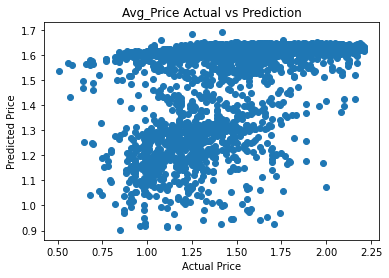

In [61]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Avg_Price Actual vs Prediction')
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_absolute_error(y_test,y_pred)

0.21643631015686457

In [63]:
mean_squared_error(y_test,y_pred)

0.07487361656981478

In [64]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.2736304379447118

In [66]:
import pickle
filename= 'avocado_pricing_model.pickle'
pickle.dump(l_reg,open(filename,'wb'))

In [69]:
# spliting dependent and independent variables on x and y axis again for region prediction
x2 = df.drop(['region','Total_Bags','year'],axis=1)
y2 = df['region']

In [70]:
x2

,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Small_Bags,Large_Bags,XLarge_Bags,type
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,0
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,0
2,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,0
4,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,0
...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13066.82,431.85,0.0,1
18245,1.71,13888.04,1191.70,3431.50,0.00,8940.04,324.80,0.0,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9351.80,42.31,0.0,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10919.54,50.00,0.0,1


In [71]:
y2

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 10603, dtype: int32

In [74]:
# splitting in test and train
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=0.30,random_state=60)
y2_train.head()

6638     19
4623     34
12513    11
15588    15
14979     4
Name: region, dtype: int32

In [83]:
# hyperparameter tuning for best result
grid_param = {'criterion':['gini','entropy'],
            'max_depth':range(10,15),
            'min_samples_leaf':range(2,10),
            'min_samples_split':range(3,10),
            'max_leaf_nodes':range(2,4)}

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x2_train,y2_train)
grid_search = GridSearchCV(estimator=clf,param_grid = grid_parm,cv=5,n_jobs=-1)

In [85]:
grid_search.fit(x2_train,y2_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(2, 4),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})

In [86]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 3, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [87]:
# using decision tree to predict region
clf = DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes=3,min_samples_split=3, max_depth=10,min_samples_leaf=2)
clf.fit(x2_train,y2_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=3, min_samples_leaf=2,
                       min_samples_split=3)

In [88]:
y_pred2 = clf.predict(x2_test)

In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(y2_test,y_pred2)

0.05375668028921723